In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import MultipleLocator

In [5]:
df=pd.read_csv('../processed_data/model_predictions.csv')
data=xr.open_dataset('../input_data/CA_1984-2023_daily_pr_masked.nc')
data_vimfc=xr.open_dataset('../input_data/Vertical_Integrated_Moisture_convergence.nc')
data_rel=xr.open_dataset("../processed_data/lrp_relevance_pos_days.nc")
data_rel_n=xr.open_dataset("../processed_data/lrp_relevance_neg_days.nc")

In [6]:
df_pos=df[df['predicted_class']==1]
df_pos=df_pos.sort_values(by='prob_1', ascending=False)
df_region=np.array(pd.to_datetime(df_pos['date']))

df_neg=df[df['predicted_class']==0]
df_neg=df_neg.sort_values(by='prob_0', ascending=False)
df_region_neg=np.array(pd.to_datetime(df_neg['date']))

data_mean=data_vimfc.where(data_vimfc.time.isin([df_region]), drop=True)
data_mean=data_mean.VIMFC.mean(axis=0)
data_mean_1=data_vimfc.where(data_vimfc.time.isin([df_region[0]]), drop=True)
data_mean_1=data_mean_1.VIMFC.mean(axis=0)
data_mean_2=data_vimfc.where(data_vimfc.time.isin([df_region_neg[0]]), drop=True)
data_mean_2=data_mean_2.VIMFC.mean(axis=0)

data_lrp_mean=data_rel.vimfc.mean(axis=0)
data_lrp_1=data_rel.where(data_rel.time.isin([df_region[0]]), drop=True)
data_lrp_1=data_lrp_1.vimfc.mean(axis=0)
data_lrp_2=data_rel_n.where(data_rel_n.time.isin([df_region_neg[0]]), drop=True)
data_lrp_2=data_lrp_2.vimfc.mean(axis=0)

data_mean_pr=data.where(data.time.isin([df_region]), drop=True)
data_mean_pr=data_mean_pr.pr.mean(axis=0)
data_mean_pr_1=data.where(data.time.isin([df_region[0]]), drop=True)
data_mean_pr_1=data_mean_pr_1.pr.mean(axis=0)
data_mean_pr_2=data.where(data.time.isin([df_region_neg[0]]), drop=True)
data_mean_pr_2=data_mean_pr_2.pr.mean(axis=0)

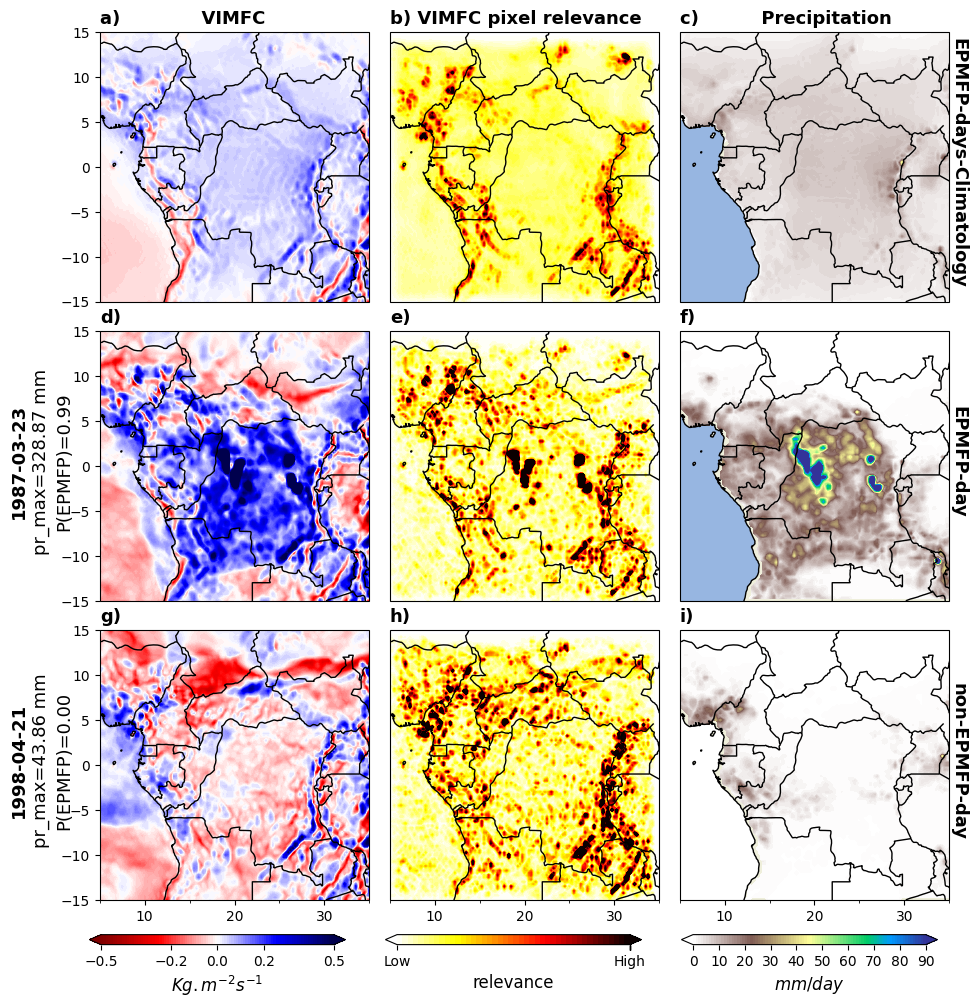

In [41]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(16, 10))
lon=data_vimfc.lon
lat=data_vimfc.lat


level=np.arange(-0.5, 0.51, 0.01)
level1=np.arange(0, 0.045, 0.001)
level2=np.arange(0, 91, 1)

cmap='seismic_r'
cmap1='hot_r'
cmap2='terrain_r'


ax = fig.add_subplot(3, 3, 1, projection=projection)
mymap = ax.contourf(lon, lat, data_mean, extend='both', cmap=cmap, levels=level)
ax.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_yticks(np.arange(-15, 16, 5), [str(x) for x in np.arange(-15, 16, 5)])
#ax.text(6.5, 12.5, 'a', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax.set_title('a)             VIMFC', fontsize=13, fontweight='bold', loc= 'left')


ax1 = fig.add_subplot(3, 3, 2, projection=projection)
mymap1 = ax1.contourf(lon, lat, data_lrp_mean*100, extend='both', cmap=cmap1, levels=level1)
ax1.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax1.add_feature(cfeature.BORDERS.with_scale('50m'))
ax1.add_feature(cfeature.LAND.with_scale('50m'))
ax1.add_feature(cfeature.OCEAN.with_scale('50m'))
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax1.text(6.5, 12.5, 'b', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax1.set_title('b) VIMFC pixel relevance', fontsize=13, fontweight='bold', loc= 'left')

ax2 = fig.add_subplot(3, 3, 3, projection=projection)
mymap2 = ax2.contourf(data.longitude, data.latitude, data_mean_pr, extend='both', cmap=cmap2, levels=level2)
ax2.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax2.add_feature(cfeature.BORDERS.with_scale('50m'))
ax2.add_feature(cfeature.LAND.with_scale('50m'))
ax2.add_feature(cfeature.OCEAN.with_scale('50m'))
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax2.text(35, 0.5, 'EPMFP-days-Climatology', rotation= -90, verticalalignment='center', fontsize=13, fontweight='bold')
#ax2.text(6.5, 12.5, 'c', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax2.set_title('c)          Precipitation', fontsize=13, fontweight='bold', loc= 'left')

ax = fig.add_subplot(3, 3, 4, projection=projection)
mymap = ax.contourf(lon, lat, data_mean_1, extend='both', cmap=cmap, levels=level)
ax.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_yticks(np.arange(-15, 16, 5), [str(x) for x in np.arange(-15, 16, 5)])
ax.text(-5, 0.5, '1987-03-23', rotation=90, verticalalignment='center', fontsize=13, fontweight='bold')
ax.text(-2.5, 0.5, 'pr_max=328.87 mm', rotation=90, verticalalignment='center', fontsize=13)
ax.text(0, 0.5, 'P(EPMFP)=0.99', rotation=90, verticalalignment='center', fontsize=13)
#ax.text(6.5, 12.5, 'd', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax.set_title('d)', fontsize=13, fontweight='bold', loc= 'left')

ax1 = fig.add_subplot(3, 3, 5, projection=projection)
mymap1 = ax1.contourf(lon, lat, data_lrp_1*100, extend='both', cmap=cmap1, levels=level1)
ax1.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax1.add_feature(cfeature.BORDERS.with_scale('50m'))
ax1.add_feature(cfeature.LAND.with_scale('50m'))
ax1.add_feature(cfeature.OCEAN.with_scale('50m'))
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
#ax1.text(6.5, 12.5, 'e', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax1.set_title('e)', fontsize=13, fontweight='bold', loc= 'left')

ax2 = fig.add_subplot(3, 3, 6, projection=projection)
mymap2 = ax2.contourf(data.longitude, data.latitude, data_mean_pr_1, extend='both', cmap=cmap2, levels=level2)
ax2.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax2.add_feature(cfeature.BORDERS.with_scale('50m'))
ax2.add_feature(cfeature.LAND.with_scale('50m'))
ax2.add_feature(cfeature.OCEAN.with_scale('50m'))
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax2.text(35, 0.5, 'EPMFP-day', rotation= -90, verticalalignment='center', fontsize=13, fontweight='bold')
#ax2.text(6.5, 12.5, 'f', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax2.set_title('f)', fontsize=13, fontweight='bold', loc= 'left')

ax = fig.add_subplot(3, 3, 7, projection=projection)
mymap = ax.contourf(lon, lat, data_mean_2, extend='both', cmap=cmap, levels=level)
ax.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax.add_feature(cfeature.BORDERS.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.set_yticks(np.arange(-15, 15, 5), [str(x) for x in np.arange(-15, 16, 5)])
ax.set_xticks(np.arange(5, 36, 5), [str(x) for x in np.arange(5, 36, 5)])
ax.text(-5, 0.5, '1998-04-21', rotation=90, verticalalignment='center', fontsize=13, fontweight='bold')
ax.text(-2.5, 0.5, 'pr_max=43.86 mm', rotation=90, verticalalignment='center', fontsize=13)
ax.text(0, 0.5, 'P(EPMFP)=0.00', rotation=90, verticalalignment='center', fontsize=13)
#ax.text(6.5, 12.5, 'g', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax.set_title('g)', fontsize=13, fontweight='bold', loc= 'left')

ax1 = fig.add_subplot(3, 3, 8, projection=projection)
mymap1 = ax1.contourf(lon, lat, data_lrp_2*100, extend='both', cmap=cmap1, levels=level1)
ax1.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax1.add_feature(cfeature.BORDERS.with_scale('50m'))
ax1.add_feature(cfeature.LAND.with_scale('50m'))
ax1.add_feature(cfeature.OCEAN.with_scale('50m'))
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax1.set_xticks(np.arange(5, 36, 5), [str(x) for x in np.arange(5, 36, 5)])
#ax1.text(6.5, 12.5, 'h', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax1.set_title('h)', fontsize=13, fontweight='bold', loc= 'left')

ax2 = fig.add_subplot(3, 3, 9, projection=projection)
mymap2 = ax2.contourf(data.longitude, data.latitude, data_mean_pr_2, extend='both', cmap=cmap2, levels=level2)
ax2.set_extent([min(lon), max(lon), min(lat), max(lat)])
ax2.add_feature(cfeature.BORDERS.with_scale('50m'))
ax2.add_feature(cfeature.LAND.with_scale('50m'))
ax1.add_feature(cfeature.OCEAN.with_scale('50m'))
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax2.set_xticks(np.arange(5, 36, 5), [str(x) for x in np.arange(5, 36, 5)])
ax2.text(35, 0.4, 'non-EPMFP-day', rotation= -90, verticalalignment='center', fontsize=13, fontweight='bold')
#ax2.text(6.5, 12.5, 'i', bbox=dict(facecolor='white', alpha=1), fontweight='bold', horizontalalignment='center',verticalalignment='bottom', color='black', fontsize=12)
ax2.set_title('i)', fontsize=13, fontweight='bold', loc= 'left')

plt.tight_layout(h_pad=-0.1, w_pad=-40, rect=[0, 0.056, 1, 1])
cbaxes = fig.add_axes([0.23, 0.05, 0.16, 0.01])
cbar = plt.colorbar(mymap, orientation='horizontal', cax=cbaxes, pad=0, extend='both')
cbar.set_label(r'$Kg.m^{-2}s^{-1}$', rotation=0, fontsize=12, fontweight='bold')
ticks = [-0.5, -0.2, 0, 0.2, 0.5] 
cbar.set_ticks(ticks)

cbaxes = fig.add_axes([0.415, 0.05, 0.16, 0.01])
cbar = plt.colorbar(mymap1, orientation='horizontal', cax=cbaxes, pad=0, extend='both')
cbar.set_label(r'relevance', rotation=0, fontsize=12)
ticks = list(np.arange(0, 10))
cbar.set_ticks(ticks)
cbar.set_ticklabels(['Low', '', '', '', '', '', '', '', '', 'High'])


cbaxes = fig.add_axes([0.60, 0.05, 0.16, 0.01])
cbar = plt.colorbar(mymap2, orientation='horizontal', cax=cbaxes, pad=0, extend='both')
cbar.set_label(r'$mm/day$', rotation=0, fontsize=12, fontweight='bold')
plt.savefig('../figures/Figure4.eps', bbox_inches='tight', pad_inches=0.1, format='eps', dpi=600)
plt.savefig('../figures/Figure4.jpg', bbox_inches='tight', pad_inches=0.1, format='jpg', dpi=600) 